In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import networkx as nx   # install it if missing: !pip install networkx

In [4]:
from src.config.config import get_config
from src.context import context

In [5]:
context.environment = 'development'  # or 'dev', depends on your config files
context.config = get_config(context)

In [6]:
def draw_graph(graph, *, ax=None, save_path=None):
    if ax is None:
        ax = plt.axes()
    # NOTE: 
    # We need `.reverse` here because we have reversed
    # our adjacency list for convenience. You shouldn't
    # care about that detail.
    nx_graph = nx.DiGraph(graph.edges).reverse()
    nx.draw_networkx(nx_graph, ax=ax)
    if save_path is not None:
        ax.figure.savefig(save_path)

    return ax

In [7]:
from src.training.data import build_datasets  # the graph used for testing
graph = build_datasets()

[2021-11-25 20:14:43,050 | DEBUG]	findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
[2021-11-25 20:14:43,051 | DEBUG]	findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
[2021-11-25 20:14:43,052 | DEBUG]	findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
[2021-11-25 20:14:43,054 | DEBUG]	findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
[2021-11-25 20:14:43,055 | DEBUG]	findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
[2021-11-25 20:14:43,056 | DEBUG]	findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
[2021-11-25 20:14:43,056 | DEBUG]	findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[2021-11-25 20:14:43,057 | DEBUG]	findfont: score(<Fon

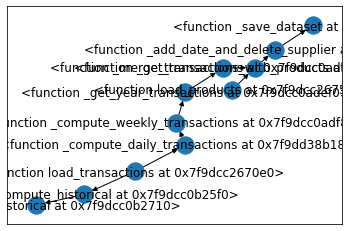

In [8]:
draw_graph(graph);

In [9]:
from src.libs.dag.utils import map_adjacency

In [10]:
def draw_graph(graph, *, ax=None, save_path=None):
    if ax is None:
        ax = plt.axes()

    # We use our utils function here: using the __name__
    # special attributes that is attached to every Python
    # functions or classes.
    adjacency = map_adjacency(lambda f: f.__name__, graph.edges)
    nx_graph = nx.DiGraph(adjacency).reverse()
    nx.draw_networkx(nx_graph, ax=ax)
    if save_path is not None:
        ax.figure.savefig(save_path)
    return ax

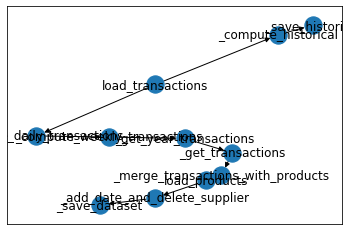

In [11]:
draw_graph(graph);

In [12]:
from pyvis.network import Network

In [13]:
def draw_graph(graph, *, path=None, backend='pyvis', ax=None):
    """
    Draw a graph using prefered backend.

    Args:
    -----
        graph: a `dag.graph.Graph` object
        path (Path|str): where to save the file (required for pyvis backend)
        backend: 'pyvis' or 'matplotlib'
        ax (matplotlib.pyplot.axes): optional for matplotlib
    """
    adjacency = map_adjacency(lambda f: f.__name__, graph.edges)
    nx_graph = nx.DiGraph(adjacency).reverse()
    
    if backend == 'matplotlib':
        if ax is None:
            ax = plt.axes()
        nx.draw_networkx(nx_graph, ax=ax)
        if path is not None:
            ax.figure.savefig(path)

        return ax

    elif backend == 'pyvis':
        assert path is not None, (
            "'path' is required if you're using pyvis backend."
        )
        net = Network(directed=True, notebook=True)
        net.from_nx(nx_graph)

        return net.show(str(path))

    else:
        raise NotImplementedError("Unknown backend.")

In [14]:
draw_graph(graph, path='graph.html')

In [15]:
def execute_graph(graph):
    for node in graph.topo_sorted():
        print(node)  # useless, but enough for now.

In [16]:
execute_graph(graph)

<function load_products at 0x7f9dcc267560>
<function load_transactions at 0x7f9dcc2670e0>
<function _compute_historical at 0x7f9dcc0b25f0>
<function _save_historical at 0x7f9dcc0b2710>
<function _compute_daily_transactions at 0x7f9dd38b1830>
<function _compute_weekly_transactions at 0x7f9dcc0adf80>
<function _get_year_transactions at 0x7f9dcc0adef0>
<function _get_transactions at 0x7f9dcc0adb90>
<function _merge_transactions_with_products at 0x7f9dcc0b2050>
<function _add_date_and_delete_supplier at 0x7f9dcc0b2440>
<function _save_dataset at 0x7f9dcc0b2680>


In [17]:
def execute_graph(graph):
    for node in graph.topo_sorted():
        print(graph.get_node_dependencies(node))  # useless, but enough for now.

In [18]:
execute_graph(graph)

[]
[]
[<function load_transactions at 0x7f9dcc2670e0>]
[<function _compute_historical at 0x7f9dcc0b25f0>]
[<function load_transactions at 0x7f9dcc2670e0>]
[<function _compute_daily_transactions at 0x7f9dd38b1830>]
[<function _compute_weekly_transactions at 0x7f9dcc0adf80>]
[<function _get_year_transactions at 0x7f9dcc0adef0>]
[<function load_products at 0x7f9dcc267560>, <function _get_transactions at 0x7f9dcc0adb90>]
[<function _merge_transactions_with_products at 0x7f9dcc0b2050>]
[<function _add_date_and_delete_supplier at 0x7f9dcc0b2440>]


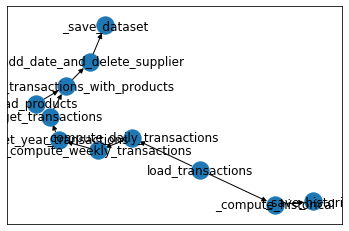

In [19]:
from src.training.data import build_datasets

graph = build_datasets()

# `draw_graph` was implemented in exercise 2
draw_graph(graph, path='graph.html')  # pyvis
# or
draw_graph(graph, backend='matplotlib');  # matplotlib

In [20]:
from src.libs.dag.executor import Executor

executor = Executor()
executor.execute(graph)  # graph = build_dataset()

[2021-11-25 20:14:58,894 | INFO]	Dataset saved at data/raw/historical.csv
/home/ubuntu/software-engineering-for-ds/day_4/src/training/data.py:38: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  daily_transactions[PERIOD_W] = pd.to_datetime(daily_transactions[DATE]).dt.week
[2021-11-25 20:14:59,035 | INFO]	NumExpr defaulting to 2 threads.
[2021-11-25 20:14:59,171 | INFO]	Dataset saved at data/raw/dataset.csv
[2021-11-25 20:14:59,172 | INFO]	Successfully executed <src.libs.dag.graph.Graph object at 0x7f9dcbab5bd0>.


In [21]:
l = [1,2,3]
def f(x):
    result = []
    for elt in x:
        result.append(elt+1)
    return result

In [22]:
f(l)

[2, 3, 4]

In [23]:
b = True
def f():
    if b :
        return{
        'products': 2,
        'transactions': 3
        }
    else:
        print('toto')

In [24]:
f()

{'products': 2, 'transactions': 3}

In [25]:
def f(x):
    return pow(x,2)

def g(x):
    return x/2

def h(z):
    return pow(z[0], 3) + pow(z[1], 3)

def identite(x, y):
    return (x, y)


x = 3
x_f = f(x)
x_g = g(x)

identity_func = identite(f(x), g(x))
# composition de la fonction identite avec la fonction h
x_f_g = h(identity_func)
x_f_g

732.375

In [26]:
def g(x):
    return x/2

In [27]:
def h(z):
    return pow(z[0], 3) + pow(z[1], 3)
    

In [28]:
def identite(x, y):
    return (x, y)


In [29]:
x = 3
x_f = f(x)
x_g = g(x)

identity_func = identite(f(x), g(x))
# composition de la fonction identite avec la fonction h
x_f_g = h(identity_func)
x_f_g

732.375

In [30]:
def identite(x, y):
    return x, y


In [31]:
identite(f(x), g(x))

(9, 1.5)

In [32]:
class Graph():
    def __init__(self, x):
        self.x = x
        self.states = {}
    def __repr__(self):
        return f'Graph({self.x})'
    def add_edge(self, source, target):
        

SyntaxError: unexpected EOF while parsing (<ipython-input-32-95ba538f6a73>, line 8)

In [33]:
graph = Graph("gamma graph")
graph

NameError: name 'Graph' is not defined

In [34]:
from src.config.config import get_config
from src.context import context

In [35]:
# or 'dev', or whatev'... Adapt to your actual config file name
context.environment = 'development'
context.config = get_config(context)

In [47]:
from src.training.features import registry

registry.adjacency

{'product_id': [], 'period': [], 'week': ['period'], 'year': ['period']}

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
%matplotlib inline
###################################################################

import matplotlib.pyplot as plt
import networkx as nx  
from pyvis.network import Network

[2021-11-25 20:15:07,996 | DEBUG]	Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [39]:
from src.config.config import get_config
from src.context import context


context.environment = 'development' # adapt to your config file names
context.config = get_config(context)

In [40]:
def draw_graph(adjacency, *, path=None, backend='pyvis', ax=None):
    nx_graph = nx.DiGraph(adjacency).reverse()
    
    if backend == 'matplotlib':
        if ax is None:
            ax = plt.axes()
        nx.draw_networkx(nx_graph, ax=ax)
        if path is not None:
            ax.figure.savefig(path)
        return ax

    elif backend == 'pyvis':
        assert path is not None, (
            "`draw_graph` needs a path if you're using pyvis backend."
        )
        net = Network(directed=True, notebook=True)
        net.from_nx(nx_graph)

        return net.show(str(path))
    else:
        raise NotImplementedError

In [41]:
from src.training.features import registry

In [42]:
draw_graph(registry.adjacency, path='graph.html')

In [48]:
from src.training.features import registry
from src.libs.features.generator import FeaturesGenerator
from src.config.directories import directories
from src.io import load_dataset

In [49]:
generator = FeaturesGenerator(registry=registry)

data = load_dataset(directories.raw_data_dir / 'dataset.csv')

generator.transform(data)

TypeError: 'FeatureRegistry' object is not iterable